In [1]:
# Load pickled data
import pickle, os

# TODO: Fill this in based on where you saved the training and testing data

training_file =   os.path.join(os.getcwd(), './train.p')
validation_file = os.path.join(os.getcwd(), './valid.p')
testing_file =    os.path.join(os.getcwd(), './test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import numpy as np
from sklearn.utils import shuffle
# Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = {0}".format(n_valid))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


In [5]:
import pandas as pd
sign_names = pd.read_csv('signnames.csv', index_col=0)
sign_names['SignName'][0]

'Speed limit (20km/h)'

In [7]:
def rotate_images(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols))
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

### Edge Mode
* Showcasing the difference between border replicate and default OpenCV border mode. 
* Notice the images on the right below have a black edge and the images on the left have an extended edge
* It is expected training with border replicate will improve training

Dataset rotated +/-15 degrees.


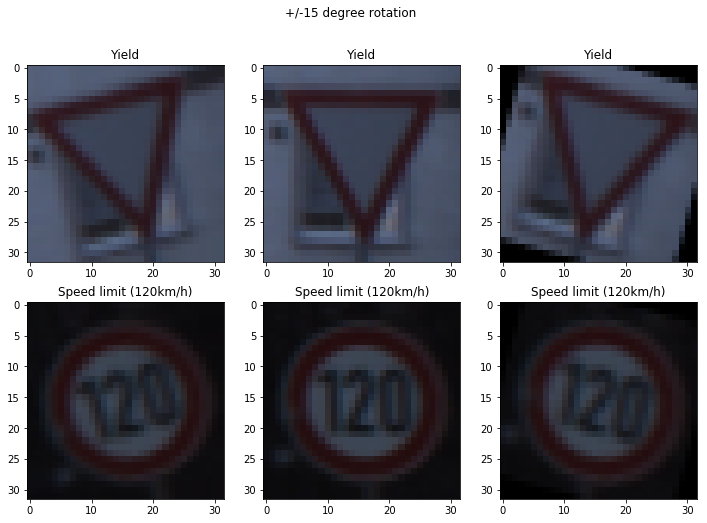

In [9]:
degrees = 15
X_pos, X_neg = rotate_images(X_train, degrees)
X_train, y_train, X_pos, X_neg = shuffle(X_train, y_train, X_pos, X_neg)
fig = plt.figure(figsize=(12,8))
fig.suptitle('+/-{0} degree rotation'.format(degrees))

ax1 = plt.subplot(231)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_pos[0])

ax2 = plt.subplot(232)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax3 = plt.subplot(233)
ax3.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_neg[0])

ax4 = plt.subplot(234)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_pos[1])

ax5 = plt.subplot(235)
ax5.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax6 = plt.subplot(236)
ax6.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_neg[1])
plt.show()